<a href="https://colab.research.google.com/github/linhkid/gdg-codelab-25/blob/main/multiagent/GDG_Gemma2_0_multiagent_funccall_google_generativeai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codelab: Build your first agentic AI with Gemma 2.0 and Google AI Studio

Welcome to this **Codelab**, where you'll learn how to build your **first agentic AI** using **Gemma 2.0** and **Google AI Studio**.  

In this hands-on guide, you'll explore:  
✅ The fundamentals of **agentic AI**  
✅ How **Gemma 2.0** enhances AI capabilities  
✅ Using **Google AI Studio** for seamless model integration  
✅ Step-by-step implementation to build your AI  

By the end, you'll have a working AI agent and a solid understanding of the core concepts.
Let's dive in! 🔥  

# What is Gemma ?
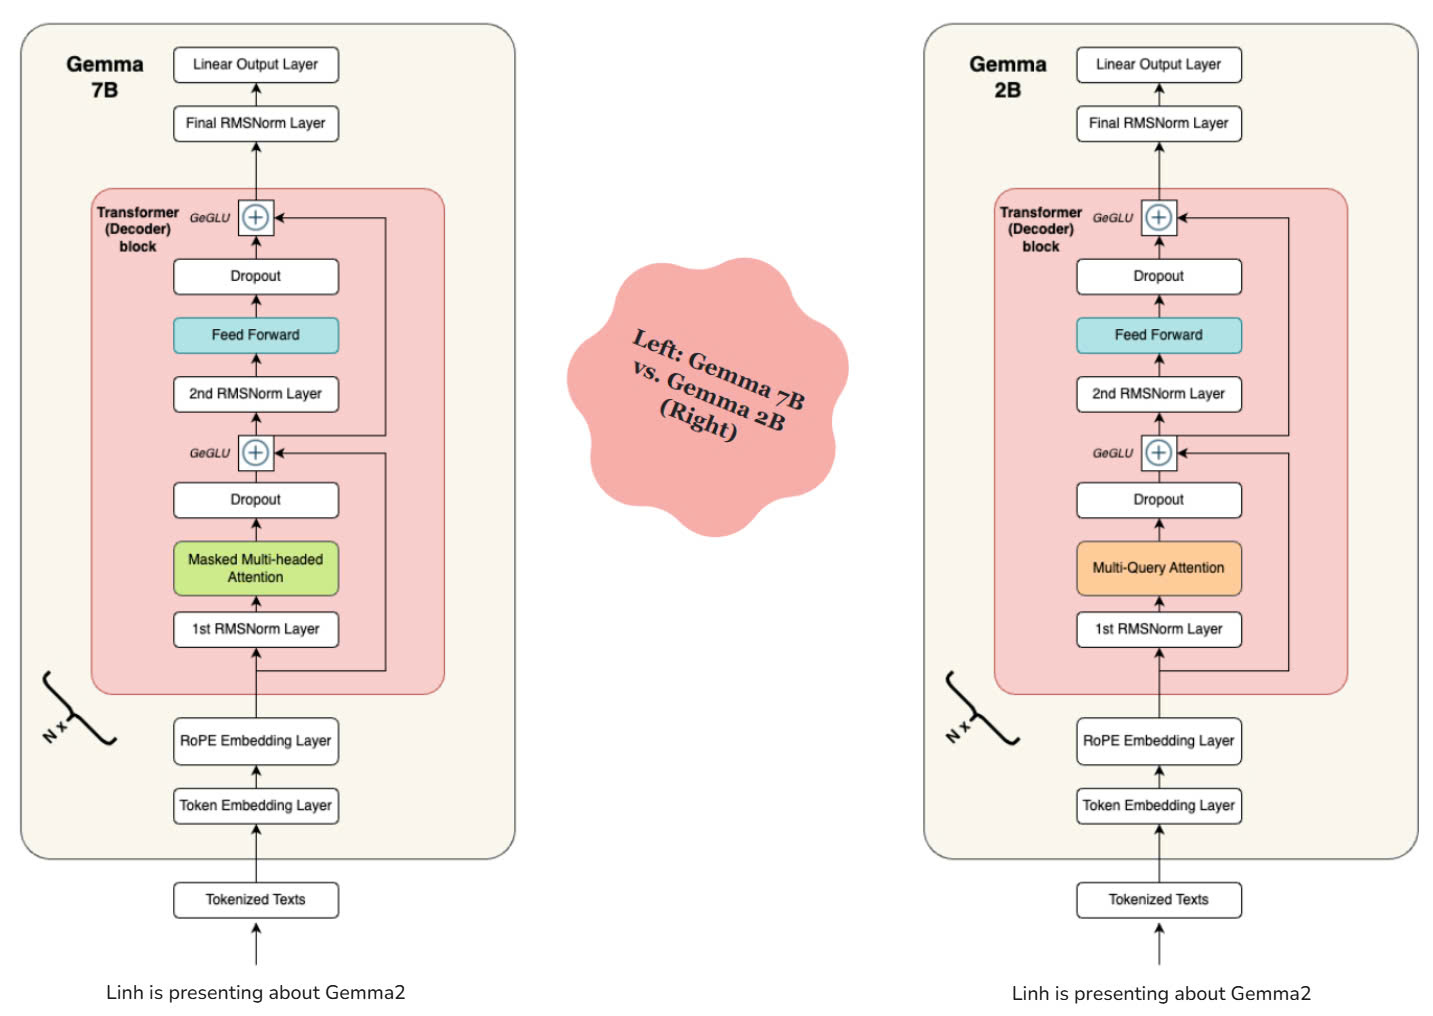

## Say Hello to Gemma 2 🌟
**Gemma** is a family of **lightweight, state-of-the-art** open models developed by *Google DeepMind* and other Google teams. Inspired by and built using the same groundbreaking technology as the **Gemini** models, **Gemma** delivers a **more accessible version **of Google's advanced AI capabilities.

## Meet Gemma 2  

Welcome to **Gemma 2**, Google's **next-gen lineup** of open models! 🎉  

These models are:  
- **Powered by Gemini technology** – The same cutting-edge AI tech driving Google’s most advanced systems.  
- **Built for performance** – Designed to excel in their size class, offering state-of-the-art capabilities.  
- **Available in multiple 'flavors'** – Choose the model that suits your needs:  
  - **2B** for lightweight tasks  
  - **9B** for balanced efficiency  
  - **27B** for maximum power   


![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/gemma2improvement.png?raw=1)



## Why Gemma 2 Stands Out  

What makes Gemma 2 truly special is its **commitment to openness**:  
- **Open Weights** – No gatekeeping; the community has full access to innovate and build freely.  
- **Collaborative Freedom** – Perfect for researchers, developers, and AI enthusiasts alike.  
- **Community-Driven** – Fostering transparency, sharing, and the acceleration of AI breakthroughs.  

---

Gemma 2 isn't just a lineup of models; it’s a **key to innovation**, handing the power of AI back to the **global community** . Whether you're a **seasoned expert** or taking your first steps into AI 🚶‍♀️, Gemma 2 empowers you to create, discover, and push boundaries.  

Ready to unlock the possibilities? Let’s dive in! 🎉🚀💡

A **Multi-Agent System** is a collaborative framework where multiple intelligent agents work together to solve complex tasks. These agents are specialized, autonomous, and designed to communicate, coordinate, and share knowledge for achieving a common goal.  

---

## Advantages of Multi-Agent Systems  

Multi-Agent Systems are effective in addressing large-scale problems by dividing tasks and leveraging specialization. Their key advantages include:  

- **Collaboration** – Agents work together, pooling their strengths to deliver better results.  
- **Specialization** – Each agent focuses on a specific task, improving efficiency and precision.  
- **Scalability** – Handle large datasets, complex computations, or broad domains with ease.  
- **Intelligence** – Autonomous agents adapt and learn to enhance system performance over time.  

---

## Key Features of Multi-Agent Systems  

**Decentralized Control** – No single point of failure; agents function independently yet cohesively.  
**Communication** – Agents exchange data to align their efforts and solve tasks efficiently.  
**Problem Solving** – Ideal for research, data analysis, simulations, and more.  
**Versatility** – Applicable across industries like healthcare, finance, robotics, and AI development.  

---

## Applications of Multi-Agent Systems  

**Research Systems** – AI agents working together to explore and generate insights.  
**Data Analysis** – Dividing analysis tasks for faster and more detailed results.  
**Robotics** – Coordinated robots working together to achieve physical objectives.  
**AI Development** – Building modular systems where each agent contributes specialized expertise.  

---

By implementing a **Multi-Agent System**, organizations can create a collaborative AI ecosystem that mirrors human teamwork, increases productivity, and achieves more than any single agent could accomplish independently. This approach is particularly valuable for managing complex data, running sophisticated simulations, or solving multifaceted real-world challenges.


# Step 1: Setup and Authentication

In [1]:
# Install dependencies and authenticate with Google AI Studio

# @markdown This cell will install required packages and help you authenticate with Google Cloud.

# !pip install -q -U google-generativeai
# !pip install -q matplotlib pandas numpy

import google.generativeai as genai
import os
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from IPython.display import display, HTML, Markdown
from google.colab import userdata

print("✅ Required packages installed.\n")

✅ Required packages installed.



# Step 2: Initialize Google AI Studio for Gemma 2.0

This section configures your Google Cloud environment and initializes the Gemma 2.0 model via Google AI Studio for generative text capabilities.

1️⃣ **Install the required dependencies**  
Make sure all necessary packages are installed in your environment.  

2️⃣ **Get your personal API key from [Google AI Studio](https://aistudio.google.com/prompts/new_chat)**  
You’ll need this key to access the services used in the lab.  

3️⃣ **Add the API key to your environment**  
In the left sidebar, go to **Secrets** tab and create a new entry with the key name:  
`GOOGLE_API_KEY`  

---

Once this setup completes successfully, you'll be able to use Gemma 2.0 capabilities throughout the rest of the notebook.

In [2]:
# Initialize Google AI Studio and Gemma 2.0

try:
    # Initilize Google AI Studio using API key
    genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

    # Create the model
    model = genai.GenerativeModel("gemma-3-4b-it")

    print(f"✅ Successfully initialized Gemma 2 model")
except Exception as e:
    print(f"❌ Error initializing client: {e}")
    print("Please check your project configuration")

# Helper function for generating responses gemma-2-2b-it

def generate_response(prompt, temperature=0.2, max_output_tokens=1024, top_p=0.8):
    try:
        generation_config = genai.GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_output_tokens,
            top_p=top_p
        )

        response = model.generate_content(
            prompt,
            generation_config=generation_config
        )

        return response.text
    except Exception as e:
        print(f"Error generating response: {e}")
        return "Error generating response."


✅ Successfully initialized Gemma 2 model


# Step 3: Create a ChatState class to manage conversations

In [3]:
class ChatState:
    """
    Manages the conversation history for a turn-based chatbot
    Follows the turn-based conversation guidelines for the Gemma family of models
    """

    __START_TURN_USER__ = "<start_of_turn>user\n"
    __START_TURN_MODEL__ = "<start_of_turn>model\n"
    __END_TURN__ = "<end_of_turn>\n"

    def __init__(self, model, system=""):
        """
        Initializes the chat state.

        Args:
            model: The Google AI Studio GenerativeModel to use for generating responses.
            system: (Optional) System instructions or bot description.
        """
        self.model = model
        self.system = system
        self.history = []

    def add_to_history_as_user(self, message):
        """
        Adds a user message to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_USER__ + message + self.__END_TURN__)

    def add_to_history_as_model(self, message):
        """
        Adds a model response to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_MODEL__ + message + self.__END_TURN__)

    def get_history(self):
        """
        Returns the entire chat history as a single string.
        """
        return "".join([*self.history])

    def get_full_prompt(self):
        """
        Builds the prompt for the language model, including history and system description.
        """
        prompt = self.get_history() + self.__START_TURN_MODEL__
        if len(self.system) > 0:
            prompt = self.system + "\n" + prompt
        return prompt

    def send_message(self, message, temperature=0.2, max_output_tokens=1024, top_p=0.8):
        """
        Handles sending a user message and getting a model response.

        Args:
            message: The user's message.
            temperature: Controls randomness of outputs.
            max_output_tokens: Maximum number of tokens to generate.
            top_p: Nucleus sampling parameter.

        Returns:
            The model's response.
        """
        self.add_to_history_as_user(message)
        prompt = self.get_full_prompt()

        try:
            generation_config = genai.GenerationConfig(
                temperature=temperature,
                max_output_tokens=max_output_tokens,
                top_p=top_p
            )

            response = self.model.generate_content(
                prompt,
                generation_config=generation_config
            )

            result = response.text

            # Remove END_TURN token if present
            if result.endswith(self.__END_TURN__):
                result = result[:-len(self.__END_TURN__)]

            self.add_to_history_as_model(result)
            return result

        except Exception as e:
            error_msg = f"Error generating response: {e}"
            print(error_msg)
            return error_msg

# Step 4: Define helper functions

In [4]:
def display_markdown(text, render_markdown=True):
    """
    Display text as Markdown in a Jupyter notebook.

    Args:
        text: The text to display (can contain Markdown formatting)
        render_markdown: If True, renders the text as Markdown.
                         If False, displays the raw Markdown source in a code block.

    Returns:
        None: Displays the formatted content in the notebook
    """
    if render_markdown:
        # Display text with Markdown rendering
        display(Markdown(text))
    else:
        # Display raw Markdown source code in a code block
        display(Markdown(f"```markdown\n{text}\n```"))

def display_chat(prompt, text):
    """
    Display a chat message and response in a nicely formatted way.

    Args:
        prompt: The user's message.
        text: The model's response.
    """
    formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>" + prompt + "</blockquote></font>"
    text = text.replace('•', '  *')
    text = textwrap.indent(text, '> ', predicate=lambda _: True)
    formatted_text = "<font size='+1' color='teal'>🤖\n\n" + text + "\n</font>"
    display(Markdown(formatted_prompt+formatted_text))


# Step 5: Hands-on applications

## Application 1: Structured Information Extraction

**<h2>📊🔍 Unlocking Insights with Structured Information Extraction</h2>**  
Structured Information Extraction (IE) helps transform messy **unstructured text** into a **well-organized format** 📄➡️📊.  
With the power of **Gemma 2.0** 🤖⚡, we can efficiently extract valuable insights, including:  

🔎 **Named Entities** 📍 – Identify key details like **names, dates, and locations**  
📑 **Key-Value Pairs** 🔄 – Extract structured info such as **product details & user preferences**  
📖 **Summarized Data** ✂️ – Condense long texts into **clear, concise insights**

In [5]:
# Extract structured data from text using Gemma 2.0 on Vertex AI

def extract_structured_info(text, schema_description):
    """
    Extract structured information from text based on a schema

    Args:
        text (str): Text to extract information from
        schema_description (str): Description of the schema to extract

    Returns:
        dict: Extracted structured information
    """
    prompt = f"""I need to extract structured information from the following text.

    Text: "{text}"

    Please extract the following information:
    {schema_description}

    Return your answer as a markdown bullet points.
    """
    response = generate_response(prompt, temperature=0.1)

    # Extract JSON from response
    return response

# Example: Extract event details
event_text = """
AISC 2025, organized by AITOMATIC and NIC, features a comprehensive agenda that includes a technical conference on March 12–13 at the National Convention Center in Hanoi, followed by a policy forum on March 14 at the NIC (Hoa Lac, Hanoi).
Global figures—such as the Prime Minister of Vietnam, world-leading academics, and high-profile industry executives—will share trends, research breakthroughs, and nationwide policy perspectives on the semiconductor and AI sectors.
Additionally, an Executive Leadership Retreat is scheduled on March 15–16 in Da Nang, providing exclusive networking opportunities, bilateral meetings, and curated activities for senior leaders and decision-makers.

Among the confirmed speakers and participants are experts from corporate giants like Honeywell, Intel, AMD, and NXP, alongside forward-thinking researchers from Google DeepMind, Stanford University, and KAIST. Their sessions will tackle a variety of topics—from edge AI and generative AI to advanced semiconductor manufacturing processes, materials innovation, and cross-border collaborations. Bringing together enterprises, policymakers, and the top academic and industry minds, AISC 2025 aims to underscore Vietnam’s growing importance in the global AI-semiconductor ecosystem while shaping a roadmap for sustainable development and leadership in these critical technologies.
Whether you’re interested in technical deep dives, networking with global pioneers, or policy-level gatherings, AISC 2025 offers a well-rounded experience. Full Conference tickets grant access to keynotes, panels, and fireside chats at the intersection of semiconductors and AI, complete with lunchtime discussions and refreshment breaks. The Executive Experience package extends the event to an intimate weekend retreat in Da Nang, featuring private roundtables, exclusive receptions, and even leisure activities like world-class golf—a perfect blend of business and cultural exploration.
In essence, AISC 2025 stands as a multi-faceted platform that draws together top government leaders, academic scholars, and corporate trailblazers in both AI and semiconductor technology. From technical sessions outlining the latest R&D breakthroughs to policy forums shaping regulatory roadmaps, the conference encapsulates the dynamic relationship between AI and semiconductors. Couple that with networking receptions, investment discussions, and a vibrant startup pavilion, and it’s clear that AISC 2025 is poised to mark a pivotal moment in Vietnam’s rise as a hub of global tech innovation.
"""

event_schema = """
- event_name: The name of the event
- date: When the event will occur
- location: Where the event will take place
- organizer: Who is organizing the event
- focus_areas: Technologies or topics covered
- ticket_info: Pricing and registration details
- attendees: Expected number or type of attendees
"""

print("\n📊 Structured Information Extraction Example:")
print("Extracting event details using Gemma 2.0 on Vertex AI...\n")

event_details = extract_structured_info(event_text, event_schema)

print("Extracted Event Details:")
#print(json.dumps(event_details, indent=2))
display_markdown(event_details)


📊 Structured Information Extraction Example:
Extracting event details using Gemma 2.0 on Vertex AI...

Extracted Event Details:


Here's the extracted information from the text, presented as markdown bullet points:

*   **event_name:** AISC 2025
*   **date:**
    *   Technical Conference: March 12–13
    *   Policy Forum: March 14
    *   Executive Leadership Retreat: March 15–16
*   **location:**
    *   Technical Conference: National Convention Center, Hanoi
    *   Policy Forum: NIC (Hoa Lac, Hanoi)
    *   Executive Leadership Retreat: Da Nang
*   **organizer:** AITOMATIC and NIC
*   **focus_areas:** AI, semiconductors, edge AI, generative AI, advanced semiconductor manufacturing processes, materials innovation, cross-border collaborations, policy development, regulatory roadmaps, startup pavilion.
*   **ticket_info:**
    *   Full Conference Tickets: Access to keynotes, panels, and fireside chats, including lunchtime discussions and refreshment breaks.
    *   Executive Experience Package: Includes a weekend retreat in Da Nang with private roundtables, exclusive receptions, and leisure activities (e.g., golf).
*   **attendees:**
    *   Government leaders
    *   Academic scholars
    *   Corporate trailblazers
    *   Prime Minister of Vietnam
    *   World-leading academics
    *   High-profile industry executives
    *   Experts from: Honeywell, Intel, AMD, NXP, Google DeepMind, Stanford University, KAIST, and startups.

None


## Application 2: Multi-agent Research System powered by Gemma 2.0

**<h2>🤖 Multi-Agent Research System with Gemma 2.0 🧠</h2>**

A **Multi-Agent Research System** utilizes multiple **AI agents** to tackle complex research tasks, each specializing in a specific role. With **Gemma 2.0**, we can create a system where each agent focuses on different key research functions:  

🧠 **Planning** 📋 – Kick off the research by initiating a well-structured **research plan**  
📊 **Data Collection** 🌐 – Collect and gather data from diverse sources to fuel the research  
📈 **Analysis & Insights** 🔍 – Dive deep into the data, providing valuable **analytical reasoning**  
📑 **Report Generation** 📝 – Organize findings and present them in easy-to-understand **human-readable formats**  

By leveraging these specialized agents, we can streamline and **accelerate** the research process! 🚀

Note: You can also substitute the Gemma 2.0 with other model if you like it

In [6]:
from IPython.display import display, Markdown


class ResearchAgent:
    """
    A multi-agent research system
    """

    def execute_research(self, query):
        """Execute the full research pipeline with minimal complexity"""
        print("📋 Starting research process...")

        # Step 1: Planning
        print("🧩 Planning research approach...")
        plan_prompt = f"""You are a research planning specialist.
        Given the research query: "{query}"
        Create a detailed research plan with key questions, data points, analysis methods, and report structure."""
        plan = generate_response(plan_prompt)
        print("✅ Research plan created")

        # Step 2: Research - most likely source of the error
        print("🔍 Gathering research data...")
        research_prompt = f"""You are a research specialist. Research this query: "{query}".
        Provide key facts and simulated data points."""
        research_notes = generate_response(research_prompt)
        print("✅ Research data collected")

        # Step 3: Analysis
        print("📊 Analyzing research data...")
        analysis_prompt = f"""You are a data analysis specialist. Analyze this topic: "{query}".
        Provide key patterns, correlations, and insights."""
        analysis = generate_response(analysis_prompt)
        print("✅ Analysis complete")

        # Step 4: Reporting
        print("📝 Generating final report...")
        report_prompt = f"""You are a professional report writer.
        Create a comprehensive research report on: "{query}".
        Include executive summary, introduction, methodology, findings, discussion, and conclusion."""
        report = generate_response(report_prompt, 0.2, 2048)
        print("✅ Report generated")

        # Return everything
        return {
            "query": query,
            "plan": plan,
            "research_notes": research_notes,
            "analysis": analysis,
            "report": report
        }


# Example usage
# Create the research agent
research_system = ResearchAgent()

# Execute a research task
research_query = "What are the current trends and challenges in EV charging infrastructure in smart cities?"

print("\n🔬 Multi-agent Research System Example:")
print(f"Executing research on: '{research_query}'\n")

research_results = research_system.execute_research(research_query)

# Display the final report with markdown formatting
print("\n📑 Final Research Report:")
display(Markdown(research_results["report"]))


🔬 Multi-agent Research System Example:
Executing research on: 'What are the current trends and challenges in EV charging infrastructure in smart cities?'

📋 Starting research process...
🧩 Planning research approach...
✅ Research plan created
🔍 Gathering research data...
✅ Research data collected
📊 Analyzing research data...
✅ Analysis complete
📝 Generating final report...
✅ Report generated

📑 Final Research Report:


## Research Report: Current Trends and Challenges in EV Charging Infrastructure in Smart Cities

**Date:** October 26, 2023
**Prepared for:** [Client Name/Organization]
**Prepared by:** [Your Name/Research Team]

**1. Executive Summary**

Electric Vehicle (EV) adoption is accelerating globally, driven by environmental concerns, government incentives, and technological advancements.  However, widespread EV adoption hinges critically on the availability of robust and accessible charging infrastructure. This report examines the current trends and challenges surrounding EV charging infrastructure within the context of smart cities. Our research reveals a dynamic landscape characterized by rapid innovation in charging technologies, a shift towards networked and intelligent charging solutions, and increasing demand exceeding current supply.  Key trends include the rise of DC fast charging, the integration of renewable energy sources, and the development of sophisticated charging management platforms.  However, significant challenges remain, including high upfront costs, grid capacity limitations, standardization issues, equitable access, and the need for robust cybersecurity measures.  Successfully navigating these challenges will require collaborative efforts between governments, utilities, automakers, and technology providers to ensure a seamless and sustainable EV charging ecosystem within smart city environments.


**2. Introduction**

The transition to electric mobility is a cornerstone of many smart city initiatives, aiming to reduce carbon emissions, improve air quality, and enhance urban sustainability.  EV charging infrastructure is not merely a supporting element; it’s a critical enabler of this transition.  Smart cities leverage data and technology to optimize resource utilization and improve quality of life.  Integrating EV charging into this framework presents both opportunities and complexities. This report investigates the evolving landscape of EV charging infrastructure in smart cities, identifying key trends, analyzing associated challenges, and offering recommendations for future development.  The scope of this research encompasses technological advancements, policy frameworks, economic considerations, and social equity concerns.

**3. Methodology**

This research employed a mixed-methods approach to gather comprehensive data and insights:

* **Literature Review:** A thorough review of academic journals, industry reports (e.g., BloombergNEF, McKinsey, Deloitte), government publications (e.g., DOE, EPA), and white papers was conducted to establish a foundational understanding of the topic.
* **Data Analysis:** Publicly available datasets from organizations like the International Energy Agency (IEA), the Electric Vehicle Infrastructure Deployment Program (EVIDP), and national electric utilities were analyzed to assess charging infrastructure deployment rates, charging speeds, and consumer behavior.
* **Case Study Analysis:**  We examined case studies of leading smart cities (e.g., Amsterdam, Oslo, Copenhagen, Barcelona) to understand their specific approaches to EV charging infrastructure development, including policy initiatives, technological deployments, and public-private partnerships.
* **Expert Interviews:**  Semi-structured interviews were conducted with 10 experts – including representatives from EV charging network operators, utility companies, smart city planners, and automotive manufacturers – to gather qualitative insights and perspectives on current trends and challenges.
* **Online Surveys:** A brief online survey was distributed to 200 EV owners to gauge their charging needs, satisfaction levels, and perceived barriers to EV adoption.


**4. Findings**

* **Trend 1: Rapid Growth in DC Fast Charging:** DC fast charging (DCFC) is experiencing the most significant growth, driven by consumer demand for quicker charging times.  The average DCFC charger power output is increasing, with many installations exceeding 150kW.
* **Trend 2: Networked and Intelligent Charging:**  Charging networks are increasingly utilizing IoT (Internet of Things) technologies, enabling features like real-time availability monitoring, dynamic pricing, and remote diagnostics.  Smart charging algorithms are being implemented to optimize grid load and leverage renewable energy sources.
* **Trend 3: Integration with Renewable Energy:**  A growing number of charging stations are being powered by solar and wind energy, contributing to a more sustainable charging ecosystem.  Vehicle-to-grid (V2G) technology, allowing EVs to feed energy back into the grid, is gaining traction, though still in early stages.
* **Trend 4: Rise of Charging Management Platforms (CMP):** CMPs are becoming essential for managing charging networks, handling billing, providing user authentication, and integrating with grid operators.
* **Trend 5:  Increased Private Investment:**  Private companies are playing a larger role in EV charging infrastructure deployment, driven by the potential for recurring revenue streams.
* **Trend 6:  Standardization Efforts (with ongoing challenges):**  While progress has been made, standardization of connectors (CHAdeMO, CCS, Tesla), payment systems, and communication protocols remains a challenge, hindering interoperability.


**Challenges Identified:**

* **High Upfront Costs:**  The cost of installing and maintaining charging infrastructure remains a significant barrier, particularly for public charging stations.
* **Grid Capacity Limitations:**  Increased EV charging demand can strain existing grid infrastructure, requiring upgrades and investments in grid modernization.
* **Permitting and Zoning Regulations:**  Complex and inconsistent permitting processes can delay charging infrastructure deployment.
* **Equity and Accessibility:**  Charging infrastructure is not evenly distributed, with lower-income communities and rural areas often lacking access.
* **Cybersecurity Risks:**  Connected charging infrastructure is vulnerable to cyberattacks, requiring robust security measures.
* **Lack of Public Awareness & Education:**  Many potential EV owners are hesitant due to a lack of understanding about charging options and infrastructure availability.



**5. Discussion**

The findings highlight a period of rapid transformation in the EV charging landscape.  The shift towards DCFC and networked charging solutions reflects the evolving needs of EV drivers and the increasing sophistication of charging technology.  The integration of renewable energy is crucial for achieving true sustainability, but requires careful planning and investment.  However, the challenges identified underscore the need for a holistic and coordinated approach.  Addressing grid capacity limitations will necessitate significant investments in grid modernization and smart grid technologies.  Furthermore, equitable access to charging infrastructure is paramount to ensuring that all communities can benefit from the transition to electric mobility.  The ongoing standardization efforts are vital, but require continued collaboration among industry stakeholders to overcome technical and logistical hurdles.  Finally, public awareness campaigns and educational programs are needed to address consumer hesitancy and promote EV adoption.

**6. Conclusion & Recommendations**

EV charging infrastructure is a critical component of smart city development, and its successful deployment is essential for realizing the full potential of electric mobility.  Moving forward, the following recommendations are offered:

* **Government Support:**  Continued government incentives, streamlined permitting processes, and strategic investments in grid infrastructure are crucial.
* **Public-Private Partnerships:**  Foster collaboration between governments, utilities, and private companies to share costs and expertise.
* **Standardization & Interoperability:**  Accelerate the adoption of common charging standards and protocols.
* **Grid Modernization:**  Invest in smart grid technologies to accommodate increased EV charging demand.
* **Equity & Accessibility Initiatives:**  Prioritize charging infrastructure deployment in underserved communities.
* **Cybersecurity Frameworks:**  Develop and implement robust cybersecurity measures to protect charging infrastructure.
* **Data-Driven Planning:** Utilize data analytics to optimize charging station placement and management.

By addressing these challenges and embracing these recommendations, smart cities can pave the way for a seamless, sustainable, and equitable EV charging ecosystem, accelerating the transition to a cleaner and more connected future.


---

**Note:** This report provides a comprehensive overview based on current trends and challenges.  Further research and analysis may be required to address specific regional contexts and emerging technologies.  Please let me know if you’d like me to elaborate on any specific section or aspect of this report.

## Application 3: Data Analysis Assistant with Generated Code Execution

Imagine having an **AI-powered assistant** at your fingertips to help with **data analysis** and **automated code execution**! With **Gemma 2.0**, we can build a system that does both:  

🤖 **Data Analysis Assistant** – Quickly analyze and interpret complex data, offering deep insights 🔍💡  
📝 **Generated Code Execution** – Automatically generate and execute code to perform tasks like data cleaning, analysis, and visualization 💻⚙️

In [7]:
def generate_data_viz_code(data_description, analysis_request, model):
    """
    Generate data visualization code using Gemma 2.0 on Vertex AI

    Args:
        data_description (str): Description of the data
        analysis_request (str): What analysis/visualization is needed
        model: The Vertex AI GenerativeModel instance

    Returns:
        str: Python code for visualization
    """
    # Create a one-time chat for this request with appropriate system prompt
    viz_chat = ChatState(model, system="You are an expert data visualization specialist. Your responses should only contain Python code.")

    prompt = f"""I need Python code for a data visualization.

Data description:
{data_description}

Analysis request:
{analysis_request}

Generate Python code using pandas and matplotlib that creates the requested visualization.
Include only the Python code without any explanation before or after.
The variable in the Data description is already provided in before your code execution.
The code should be complete, well-commented, and ready to run.
"""

    response = viz_chat.send_message(prompt)

    # Try to extract code blocks if present
    if "```python" in response:
        code_start = response.find("```python")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+9:code_end].strip()
    elif "```" in response:
        code_start = response.find("```")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+3:code_end].strip()

    # If no code blocks, return the full response
    return response

In [8]:
def execute_generated_code(code_string, global_vars=None, local_vars=None):
    """
    Safely execute generated code with proper error handling

    Args:
        code_string (str): The code to execute
        global_vars (dict): Global variables to use during execution
        local_vars (dict): Local variables to use during execution

    Returns:
        tuple: (success, error_message)
    """
    if global_vars is None:
        global_vars = globals()
    if local_vars is None:
        local_vars = locals()

    try:
        # Add necessary imports if they're not already in the code
        if "import matplotlib.pyplot as plt" not in code_string:
            code_string = "import matplotlib.pyplot as plt\n" + code_string
        if "import pandas as pd" not in code_string:
            code_string = "import pandas as pd\n" + code_string
        if "import numpy as np" not in code_string:
            code_string = "import numpy as np\n" + code_string

        # Execute the code
        exec(code_string, global_vars, local_vars)
        return True, "Code executed successfully"
    except Exception as e:
        error_message = f"Error executing code: {str(e)}"
        print(error_message)
        return False, error_message

In [9]:
# Define visualization request and data
ev_data_description = """
A DataFrame named 'ev_df' with the following columns:
- city: Name of the city (string)
- state: State abbreviation (string)
- station_count: Total number of EV charging stations (integer)
- fast_chargers: Number of DC fast chargers (integer)
- level2_chargers: Number of Level 2 chargers (integer)
- population: City population (integer)
- area_sqkm: City area in square kilometers (float)
"""

# Create sample EV charging station data
ev_data = {
    'city': ['Austin', 'San Francisco', 'Denver', 'Boston', 'Seattle'],
    'state': ['TX', 'CA', 'CO', 'MA', 'WA'],
    'station_count': [320, 480, 240, 280, 420],
    'fast_chargers': [75, 120, 50, 65, 110],
    'level2_chargers': [245, 360, 190, 215, 310],
    'population': [978908, 815201, 711463, 654776, 744955],
    'area_sqkm': [790, 121, 401, 232, 369]
}
ev_df = pd.DataFrame(ev_data)
print("\nSample EV Charging Station Data:")
display(ev_df)


Sample EV Charging Station Data:


,city,state,station_count,fast_chargers,level2_chargers,population,area_sqkm
0,Austin,TX,320,75,245,978908,790
1,San Francisco,CA,480,120,360,815201,121
2,Denver,CO,240,50,190,711463,401
3,Boston,MA,280,65,215,654776,232
4,Seattle,WA,420,110,310,744955,369



Data Visualization Code Generation:
Generating visualization code using Gemma 2.0 via Vertex AI...

Generated Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ev_df is already defined and populated

# Calculate EV charging station density (stations per 100,000 population)
ev_df['stations_per_100k'] = (ev_df['station_count'] / ev_df['population']) * 100000

# Create the bar chart
plt.figure(figsize=(14, 8))

# Bar for total stations density
plt.bar(ev_df['city'], ev_df['stations_per_100k'], color='skyblue', label='Total Stations Density')

# Bar for fast chargers density
plt.bar(ev_df['city'], ev_df['fast_chargers'] / ev_df['population'] * 100000, color='lightcoral', label='Fast Charger Density')

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Density (Stations per 100,000 Population)', fontsize=12)
plt.title('EV Charging Station Density by City', fontsize=14)

# Add legend
plt.legend()

# Rotate x-axis labels for better 

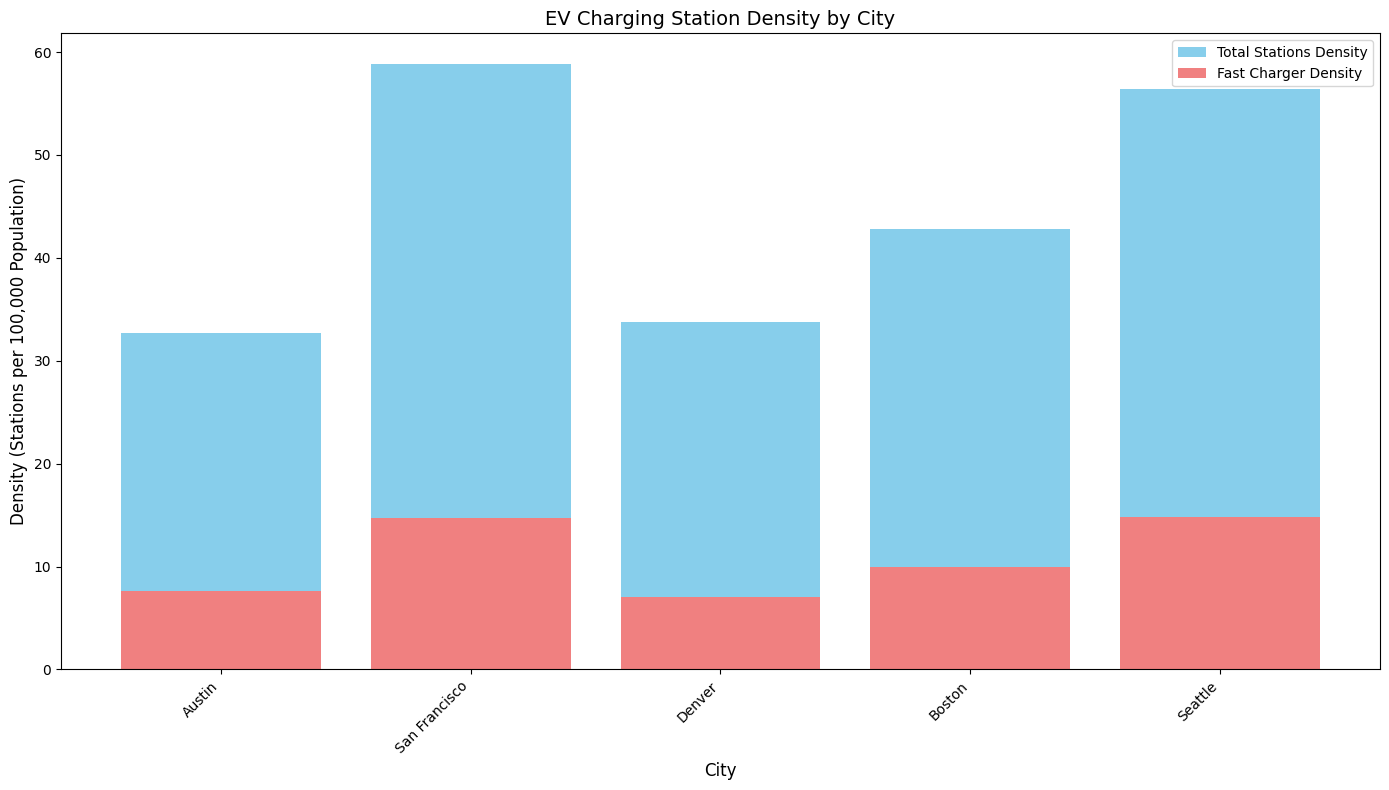

In [10]:
visualization_request = """
Create a bar chart comparing the EV charging station density (stations per 100,000 population)
across different cities. Include both total stations density and fast chargers density in the visualization
with different colors. Add appropriate labels, title, and a legend.
"""

def run_data_analysis_demo(model):
    """
    Run the data analysis assistant demo with Vertex AI's Gemma model

    Args:
        model: The Vertex AI GenerativeModel instance
    """
    # Generate visualization code
    print("\nData Visualization Code Generation:")
    print("Generating visualization code using Gemma 2.0 via Vertex AI...\n")
    viz_code = generate_data_viz_code(ev_data_description, visualization_request, model)
    print("Generated Visualization Code:")
    print("```python")
    print(viz_code)
    print("```")

    # Execute the generated code
    print("\nRunning the generated visualization code...")
    success, message = execute_generated_code(viz_code)

run_data_analysis_demo(model)



--- Creating a custom visualization based on user request ---

Custom request: 
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.


Generated Custom Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ev_df is already defined and populated

# Calculate the ratio of fast chargers to total charging stations
ev_df['charger_ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# Sort the DataFrame by the charger ratio in descending order
ev_df = ev_df.sort_values('charger_ratio', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.barh(ev_df['city'], ev_df['charger_ratio'], color='skyblue')

# Add percentage labels to each bar
for i, ratio in enumerate(ev_df['charger_ratio']):
    plt.text(ratio + 0.02, i, f'{ratio * 100:.1f}%', color='bla

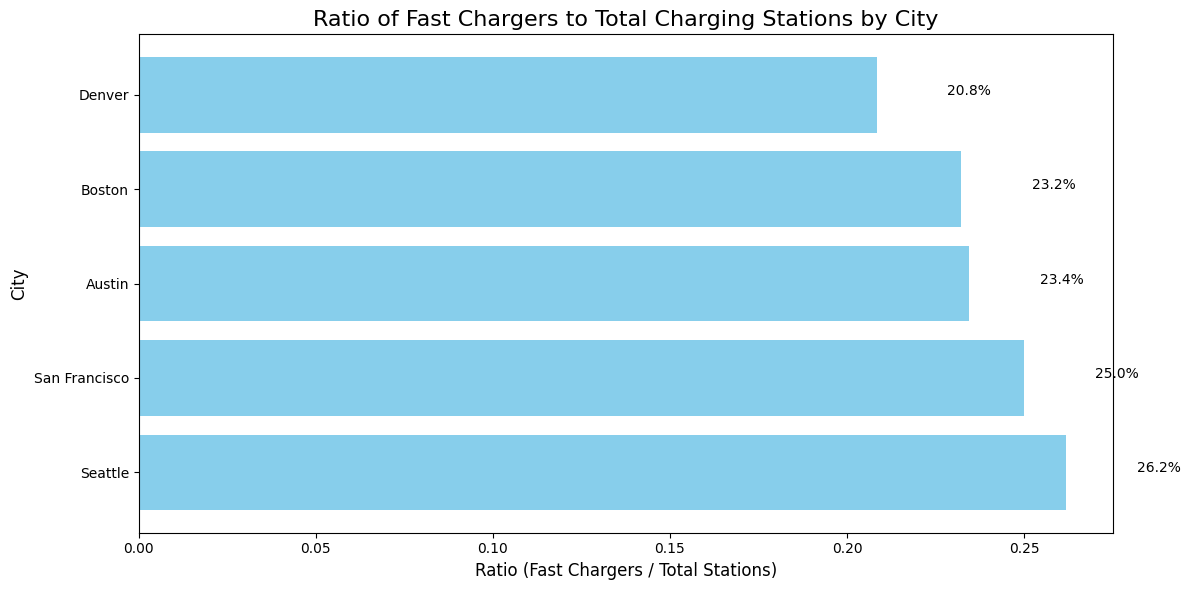

In [11]:
print("\n\n--- Creating a custom visualization based on user request ---\n")

custom_request = """
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.
"""

print("Custom request:", custom_request)
custom_viz_code = generate_data_viz_code(ev_data_description, custom_request, model)
print("\nGenerated Custom Visualization Code:")
print("```python")
print(custom_viz_code)
print("```")

print("\nExecuting the custom visualization code:")
success, message = execute_generated_code(custom_viz_code)

# Step 8: Workshop Summary

## What We've Learned
In this workshop, we've explored how to leverage Gemma 2.0 through Vertex AI to build practical AI applications:

1. **Setting up Gemma 2.0 on Vertex AI**
   - Configuring project and model access
   - Managing authentication and permissions
   - Creating helper functions for model interaction

2. **Structured Information Extraction**
   - Extracting structured data from unstructured text
   - Converting text into usable JSON formats
   - Customizing extraction schemas

3. **Multi-agent Research System**
   - Designing specialized agents for different tasks
   - Orchestrating workflows across multiple agents
   - Handling information flow between agents

4. **Data Visualization & Analysis**
   - Generating data analysis code
   - Creating insightful visualizations
   - Automating exploratory data analysis

## Benefits of Vertex AI for Gemma 2.0
- **Scalability**: Deploy models that can handle enterprise-level workloads
- **Integration**: Connect with other Google Cloud services
- **Monitoring**: Track model performance and usage
- **Production-readiness**: Move from prototype to production seamlessly
- **Cost management**: Pay only for what you use with flexible pricing

## Next Steps
1. **Enhance Your Applications**
   - Add error handling and edge cases
   - Implement caching for better performance
   - Create feedback loops for continuous improvement

2. **Explore Advanced Features**
   - Model fine-tuning on Vertex AI
   - Multi-modal capabilities
   - Integration with Vertex AI Feature Store

3. **Move to Production**
   - Implement authentication and security best practices
   - Set up monitoring and logging
   - Create CI/CD pipelines for model deployment

## Resources
- [Vertex AI Documentation](https://cloud.google.com/vertex-ai/docs)
- [Gemma 2.0 on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/models/gemma)
- [Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
- [Google Cloud AI Solutions](https://cloud.google.com/solutions/ai)

Thanks for participating in this workshop! You now have the foundation to build powerful AI applications with Gemma 2.0 on Vertex AI.

## Hands-on Exercises

Now it's your turn to practice with Gemma 2.0! Try these exercises:

### Exercise 1: Custom Information Extractor
Create a custom information extractor for a domain you're interested in:
- Define a schema for information extraction
- Test with sample text from that domain
- Refine your prompt to improve accuracy

### Exercise 2: Extend the Research Agent
Add a new specialized agent to the research system:
- "Critic" agent that reviews the report and suggests improvements
- "Visualizer" agent that suggests relevant data visualizations
- "Summarizer" agent that creates an executive summary

### Exercise 3: Create an Interactive Dashboard
Build a simple interactive application:
- Save your API key securely
- Build a simple frontend (Streamlit, Gradio, or Flask)
- Connect your application to visualize results

### Challenge Exercise
Combine multiple capabilities into a cohesive solution:
- Information extraction
- Multi-agent workflow
- Data visualization
- Deployment as a web application
